In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import numpy as np
from random import randint
import time
import datetime
import pandas as pd


tickers = ['TSLA', 'TWTR', 'MSFT', 'GOOG', 'AAPL', '^GSPC']
interval = '1d'
period1 = int(time.mktime(datetime.datetime(2012, 1, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022, 5, 20, 23, 59).timetuple()))

xlwriter = pd.ExcelWriter('historical prices.xlsx', engine='openpyxl')
for ticker in tickers:
    query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
    df = pd.read_csv(query_string)
    df.to_excel(xlwriter, sheet_name=ticker, index=False)

xlwriter.save()

In [ ]:
data = pd.ExcelFile('/content/historical prices.xlsx')

In [ ]:
tesla = pd.read_excel(data, 'TSLA')
twitter = pd.read_excel(data, 'TWTR')
microsoft = pd.read_excel(data, 'MSFT')
google = pd.read_excel(data, 'GOOG')
sp500 = pd.read_excel(data, '^GSPC')
sp500 = pd.read_excel(data, 'AAPL')

In [ ]:
new_set = []
for row_set in range(0, 100000):
    if row_set%2000==0: print(row_set)
    row_quant = randint(10, 30)
    row_start = randint(0, len(sp500)-row_quant)
    market_subset = sp500.iloc[row_start:row_start+row_quant]

    Close_Date = max(market_subset['Date'])
    if row_set%2000==0: print(Close_Date)
    
    # Close_Gap = (market_subset['Close'] - market_subset['Close'].shift(1)) / market_subset['Close'].shift(1)
    Close_Gap = market_subset['Close'].pct_change()
    High_Gap = market_subset['High'].pct_change()
    Low_Gap = market_subset['Low'].pct_change() 
    Volume_Gap = market_subset['Volume'].pct_change() 
    Daily_Change = (market_subset['Close'] - market_subset['Open']) / market_subset['Open']
    Outcome_Next_Day_Direction = (market_subset['Volume'].shift(-1) - market_subset['Volume'])
    
    new_set.append(pd.DataFrame({'Sequence_ID':[row_set]*len(market_subset),
                            'Close_Date':[Close_Date]*len(market_subset),
                           'Close_Gap':Close_Gap,
                           'High_Gap':High_Gap,
                           'Low_Gap':Low_Gap,
                           'Volume_Gap':Volume_Gap,
                           'Daily_Change':Daily_Change,
                           'Outcome_Next_Day_Direction':Outcome_Next_Day_Direction}))

 

0
2017-02-15
2000
2018-01-25
4000
2017-03-30
6000
2019-05-20
8000
2014-07-11
10000
2015-01-20
12000
2015-11-09
14000
2022-04-08
16000
2019-06-12
18000
2016-10-28
20000
2012-10-04
22000
2016-06-13
24000
2016-01-19
26000
2020-03-23
28000
2021-07-06
30000
2017-04-17
32000
2015-10-02
34000
2021-12-08
36000
2015-01-29
38000
2013-11-26
40000
2018-05-30
42000
2020-11-30
44000
2013-08-28
46000
2021-12-07
48000
2020-10-15
50000
2013-11-20
52000
2012-10-17
54000
2020-06-09
56000
2020-09-18
58000
2017-11-03
60000
2018-09-25
62000
2012-09-10
64000
2021-07-14
66000
2021-11-16
68000
2017-10-09
70000
2016-04-06
72000
2020-08-27
74000
2020-08-27
76000
2014-10-01
78000
2020-07-02
80000
2014-06-09
82000
2020-12-22
84000
2020-03-26
86000
2021-10-21
88000
2013-11-22
90000
2020-02-24
92000
2015-07-31
94000
2016-01-07
96000
2013-03-27
98000
2020-12-21


In [ ]:
len(market_subset)

12

In [ ]:
new_set_df = pd.concat(new_set)
print(new_set_df.shape)
new_set_df = new_set_df.dropna(how='any') 
print(new_set_df.shape)
new_set_df.tail(20)

(1999763, 8)
(1799763, 8)


,Sequence_ID,Close_Date,Close_Gap,High_Gap,Low_Gap,Volume_Gap,Daily_Change,Outcome_Next_Day_Direction
1684,99998,2018-09-26,-0.012419,0.003121,0.015146,0.378464,-0.017205,-30289200.0
1685,99998,2018-09-26,0.024155,0.014889,0.012418,-0.153663,0.012929,-38828400.0
1686,99998,2018-09-26,-0.011351,-0.006613,-0.000225,-0.232748,-0.008461,20783200.0
1687,99998,2018-09-26,-0.026626,-0.017149,-0.023593,0.162372,-0.019221,-22493600.0
1688,99998,2018-09-26,0.001652,-0.004934,-0.000690,-0.151187,0.002066,-17791600.0
1689,99998,2018-09-26,0.000596,-0.010052,-0.008382,-0.140882,-0.000595,-2060000.0
1690,99998,2018-09-26,0.007602,0.012112,0.017882,-0.018987,-0.000954,278551600.0
1691,99998,2018-09-26,-0.010771,-0.004139,-0.008487,2.617100,-0.014132,-274213200.0
1692,99998,2018-09-26,0.014380,-0.000452,-0.003037,-0.712266,0.018310,-12556000.0
1693,99998,2018-09-26,0.006341,0.007051,0.014172,-0.113348,0.011104,-2278800.0


In [ ]:
# create sequences
# simplify the data by binning values into three groups
 
# Close_Gap
new_set_df['Close_Gap_LMH'] = pd.qcut(new_set_df['Close_Gap'], 3, labels=["L", "M", "H"])

# High_Gap - not used in this example
new_set_df['High_Gap_LMH'] = pd.qcut(new_set_df['High_Gap'], 3, labels=["L", "M", "H"])

# Low_Gap - not used in this example
new_set_df['Low_Gap_LMH'] = pd.qcut(new_set_df['Low_Gap'], 3, labels=["L", "M", "H"])

# Volume_Gap
new_set_df['Volume_Gap_LMH'] = pd.qcut(new_set_df['Volume_Gap'], 3, labels=["L", "M", "H"])
 
# Daily_Change
new_set_df['Daily_Change_LMH'] = pd.qcut(new_set_df['Daily_Change'], 3, labels=["L", "M", "H"])

# new set
new_set_df = new_set_df[["Sequence_ID", 
                         "Close_Date", 
                         "Close_Gap_LMH", 
                         "Volume_Gap_LMH", 
                         "Daily_Change_LMH", 
                         "Outcome_Next_Day_Direction"]]

new_set_df['Event_Pattern'] = new_set_df['Close_Gap_LMH'].astype(str) + new_set_df['Volume_Gap_LMH'].astype(str) + new_set_df['Daily_Change_LMH'].astype(str)
 

In [ ]:
new_set_df.tail(10)

,Sequence_ID,Close_Date,Close_Gap_LMH,Volume_Gap_LMH,Daily_Change_LMH,Outcome_Next_Day_Direction,Event_Pattern
848,99999,2015-06-03,M,M,L,-32713200.0,MML
849,99999,2015-06-03,M,L,M,13102000.0,MLM
850,99999,2015-06-03,H,M,H,23462400.0,HMH
851,99999,2015-06-03,H,H,H,100406400.0,HHH
852,99999,2015-06-03,L,H,L,-99457600.0,LHL
853,99999,2015-06-03,H,L,H,-60399600.0,HLH
854,99999,2015-06-03,M,L,M,80604800.0,MLM
855,99999,2015-06-03,L,H,L,-75086800.0,LHL
856,99999,2015-06-03,M,L,M,6219200.0,MLM
857,99999,2015-06-03,L,M,M,-10736400.0,LMM


In [ ]:
# reduce the set
compressed_set = new_set_df.groupby(['Sequence_ID', 
                                     'Close_Date'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

print(compressed_set.shape)
compressed_set.head() 
    
    

(100000, 3)


,Sequence_ID,Close_Date,Event_Pattern
0,0,2017-02-15,"{MLM, MLH, HMH, HHH, MLM, MHH, MLM, HHM, HHH}"
1,1,2022-04-19,"{MHH, HMH, LML, LML, MLM, HMH, LML, LHM, MLH, ..."
2,2,2013-05-01,"{MMH, HLH, HHH, MHH, HLL, HHH, HLH, HMH}"
3,3,2020-05-28,"{HLH, MMM, HMH, MMM, LML, HHH, HHH, LHH, HLH, ..."
4,4,2016-01-07,"{LHL, MLM, LHL, LHM, LLL, HMM, LLL, LHL, HLM, ..."


In [ ]:
#compressed_outcomes = new_set_df[['Sequence_ID', 'Close_Date', 'Outcome_Next_Day_Direction']].groupby(['Sequence_ID', 'Close_Date']).agg()

compressed_outcomes = new_set_df.groupby(['Sequence_ID', 'Close_Date'])['Outcome_Next_Day_Direction'].mean()
compressed_outcomes = compressed_outcomes.to_frame().reset_index()
print(compressed_outcomes.shape)
compressed_outcomes.describe()

(100000, 3)


,Sequence_ID,Outcome_Next_Day_Direction
count,100000.000000,1.000000e+05
mean,49999.500000,-3.958761e+04
std,28867.657797,9.463943e+06
min,0.000000,-1.132166e+08
25%,24999.750000,-2.822282e+06
50%,49999.500000,-1.523710e+05
75%,74999.250000,2.549082e+06
max,99999.000000,1.524400e+08


In [ ]:
 
compressed_set = pd.merge(compressed_set, compressed_outcomes, on= ['Sequence_ID', 'Close_Date'], how='inner')
print(compressed_set.shape)
compressed_set.head()
    

(100000, 4)


,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2017-02-15,"{MLM, MLH, HMH, HHH, MLM, MHH, MLM, HHM, HHH}",8.500889e+05
1,1,2022-04-19,"{MHH, HMH, LML, LML, MLM, HMH, LML, LHM, MLH, ...",-1.509873e+06
2,2,2013-05-01,"{MMH, HLH, HHH, MHH, HLL, HHH, HLH, HMH}",-1.279565e+07
3,3,2020-05-28,"{HLH, MMM, HMH, MMM, LML, HHH, HHH, LHH, HLH, ...",6.679360e+05
4,4,2016-01-07,"{LHL, MLM, LHL, LHM, LLL, HMM, LLL, LHL, HLM, ...",7.312211e+06


In [ ]:
# # reduce set 

# compressed_set = new_set_df.groupby(['Sequence_ID', 'Close_Date','Outcome_Next_Day_Direction'])['Event_Pattern'].apply(lambda x: "{%s}" % ', '.join(x)).reset_index()

compressed_set['Event_Pattern'] = [''.join(e.split()).replace('{','')
                                   .replace('}','') for e in compressed_set['Event_Pattern'].values]
compressed_set.head()

,Sequence_ID,Close_Date,Event_Pattern,Outcome_Next_Day_Direction
0,0,2017-02-15,"MLM,MLH,HMH,HHH,MLM,MHH,MLM,HHM,HHH",8.500889e+05
1,1,2022-04-19,"MHH,HMH,LML,LML,MLM,HMH,LML,LHM,MLH,LML,LML,HM...",-1.509873e+06
2,2,2013-05-01,"MMH,HLH,HHH,MHH,HLL,HHH,HLH,HMH",-1.279565e+07
3,3,2020-05-28,"HLH,MMM,HMH,MMM,LML,HHH,HHH,LHH,HLH,HMH,HMM,HL...",6.679360e+05
4,4,2016-01-07,"LHL,MLM,LHL,LHM,LLL,HMM,LLL,LHL,HLM,MLM,HMH,LL...",7.312211e+06


In [ ]:
from datetime import datetime, timedelta
from pandas import DataFrame
compressed_set['Close_Date'] = pd.to_datetime(compressed_set['Close_Date'])

In [ ]:
# use last x days of data for validation
compressed_set_validation = compressed_set[compressed_set['Close_Date'] >= datetime.now() 
                                           - timedelta(days=90)] # Sys.Date()-90 

compressed_set_validation.shape

(1945, 4)

In [ ]:
compressed_set = compressed_set[compressed_set['Close_Date'] < datetime.now() 
                                           - timedelta(days=90)]  
compressed_set.shape

(98055, 4)

In [ ]:
list(compressed_set)

['Sequence_ID', 'Close_Date', 'Event_Pattern', 'Outcome_Next_Day_Direction']

In [ ]:
# drop date field
compressed_set = compressed_set[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]
compressed_set_validation = compressed_set_validation[['Sequence_ID', 'Event_Pattern','Outcome_Next_Day_Direction']]

In [ ]:
print(len(compressed_set['Outcome_Next_Day_Direction']))
len(compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000])

98055


13871

In [ ]:
# keep only keep big/interesting moves 
print('all moves:', len(compressed_set))
compressed_set = compressed_set[abs(compressed_set['Outcome_Next_Day_Direction']) > 10000000]
compressed_set['Outcome_Next_Day_Direction'] = np.where((compressed_set['Outcome_Next_Day_Direction'] > 0), 1, 0)
compressed_set_validation['Outcome_Next_Day_Direction'] = np.where((compressed_set_validation['Outcome_Next_Day_Direction'] > 0), 1, 0)
print('big moves only:', len(compressed_set)) 

all moves: 98055
big moves only: 13871


In [ ]:
compressed_set.head()

,Sequence_ID,Event_Pattern,Outcome_Next_Day_Direction
2,2,"MMH,HLH,HHH,MHH,HLL,HHH,HLH,HMH",0
8,8,"LML,HHH,HLH,LML,HLM,HHH,LML,LML,MLM,MMM,LHM,LL...",0
11,11,"HLL,LLL,LHL,LLM,MML,LML,HHL,LLM,LHM,LHL,HLH,LL...",1
18,18,"MLL,LHL,LHL,HMH,LLL,MMH,LML,LHL,MHM,HLH",1
22,22,"MLL,LLL,MHH,HMH,MHM,LLL,LHL,LHL,LML,MHM,MLM,LM...",0


In [ ]:
# create two data sets - won/not won
compressed_set_pos = compressed_set[compressed_set['Outcome_Next_Day_Direction']==1][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_pos.shape)
compressed_set_neg = compressed_set[compressed_set['Outcome_Next_Day_Direction']==0][['Sequence_ID', 'Event_Pattern']]
print(compressed_set_neg.shape)

(7035, 2)
(6836, 2)


In [ ]:
flat_list = [item.split(',') for item in compressed_set['Event_Pattern'].values ]
unique_patterns = ','.join(str(r) for v in flat_list for r in v)
unique_patterns = list(set(unique_patterns.split(',')))
len(unique_patterns)

27

In [ ]:
# build the markov transition grid
def build_transition_grid(compressed_grid, unique_patterns):
    # build the markov transition grid

    patterns = []
    counts = []
    for from_event in unique_patterns:

        # how many times 
        for to_event in unique_patterns:
            pattern = from_event + ',' + to_event # MMM,MlM

            ids_matches = compressed_grid[compressed_grid['Event_Pattern'].str.contains(pattern)]
            found = 0
            if len(ids_matches) > 0:
                Event_Pattern = '---'.join(ids_matches['Event_Pattern'].values)
                found = Event_Pattern.count(pattern)
            patterns.append(pattern)
            counts.append(found)

    # create to/from grid
    grid_Df = pd.DataFrame({'pairs':patterns, 'counts': counts})

    grid_Df['x'], grid_Df['y'] = grid_Df['pairs'].str.split(',', 1).str
    grid_Df.head()

    grid_Df = grid_Df.pivot(index='x', columns='y', values='counts')

    grid_Df.columns= [col for col in grid_Df.columns]

    # replace all NaN with zeros
    grid_Df.fillna(0, inplace=True)
    grid_Df.head()

    #grid_Df.rowSums(transition_dataframe) 
    grid_Df = grid_Df / grid_Df.sum(1)
    return (grid_Df)
 

In [ ]:
grid_pos = build_transition_grid(compressed_set_pos, unique_patterns) 
grid_neg = build_transition_grid(compressed_set_neg, unique_patterns) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: Columnar iteration over characters will be deprecated in future releases.


In [ ]:
grid_pos

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.184910,0.009983,0.008291,0.062014,0.436285,0.048350,0.071784,0.091255,0.134771,0.000000,...,0.021486,0.189689,0.243707,0.056743,0.041447,0.003903,0.189042,0.092849,0.112205,0.101746
HHL,0.000000,0.000000,0.000000,0.002176,0.000000,0.000930,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.059211,0.000000,0.000201,0.000000,0.000000,0.000000
HHM,0.022283,0.000000,0.000000,0.112061,0.000000,0.009298,0.007676,0.000000,0.025606,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.015132,0.090490,0.039380,0.001872,0.087598,0.000000
HLH,0.114347,0.003328,0.115357,0.011657,0.077754,0.085542,0.082445,0.000000,0.060310,0.000000,...,0.008057,0.054858,0.000000,0.057566,0.010526,0.008872,0.067882,0.074504,0.006398,0.013891
HLL,0.011239,0.000000,0.000000,0.000000,0.000000,0.000000,0.006397,0.288973,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004493,0.000000,0.000000
HLM,0.040852,0.000000,0.000000,0.000000,0.000000,0.000000,0.005686,0.000000,0.002358,0.010516,...,0.018353,0.210178,0.000000,0.000000,0.000000,0.005323,0.030617,0.000000,0.000000,0.118641
HMH,0.112295,0.000000,0.209084,0.021449,0.000000,0.025570,0.081876,0.106464,0.002022,0.059273,...,0.000000,0.000000,0.032037,0.052083,0.056579,0.055004,0.035754,0.002246,0.094488,0.094425
HML,0.000000,0.000000,0.000000,0.001554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012489,0.000000,0.000000,0.000000
HMM,0.056001,0.000000,0.053713,0.006372,0.000000,0.109716,0.027719,0.000000,0.009434,0.000000,...,0.000000,0.000000,0.000000,0.003838,0.007237,0.201916,0.009064,0.000000,0.000000,0.044866


In [ ]:
grid_neg

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.071278,0.139690,0.056529,0.065006,0.184343,0.050281,0.061534,0.046703,0.132061,0.000000,...,0.027214,0.148564,0.085336,0.044515,0.192899,0.017307,0.124985,0.108601,0.132516,0.103210
HHL,0.000000,0.000000,0.000000,0.020107,0.000000,0.029268,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010108,0.000000,0.000000,0.000000
HHM,0.031952,0.000000,0.000000,0.014738,0.000000,0.000000,0.028907,0.000000,0.058824,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004734,0.033532,0.029254,0.005213,0.000766,0.000000
HLH,0.105337,0.203991,0.120972,0.054039,0.027778,0.211257,0.083286,0.085165,0.043631,0.000000,...,0.074715,0.032459,0.094654,0.000530,0.042209,0.182531,0.107861,0.029974,0.045576,0.111681
HLL,0.019195,0.000000,0.000000,0.000000,0.000000,0.000000,0.003148,0.021978,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.117361,0.000000,0.017376,0.000000,0.000000
HLM,0.080056,0.000000,0.000000,0.000000,0.000000,0.000000,0.007155,0.000000,0.000779,0.017825,...,0.098466,0.121099,0.000000,0.000000,0.022485,0.012439,0.062552,0.000000,0.000000,0.047704
HMH,0.071161,0.000000,0.076880,0.049583,0.000000,0.000000,0.080853,0.000000,0.025711,0.014260,...,0.104899,0.000000,0.040216,0.082141,0.094280,0.058951,0.069093,0.033015,0.247415,0.145118
HML,0.000000,0.000000,0.000000,0.000228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000789,0.055706,0.010108,0.000000,0.000000,0.000000
HMM,0.036400,0.000000,0.000000,0.037130,0.000000,0.022139,0.054093,0.000000,0.000000,0.000000,...,0.024245,0.000000,0.000000,0.000530,0.001183,0.056787,0.019741,0.000000,0.004596,0.020285


In [ ]:
def safe_log(x,y):
   try:
      lg = np.log(x/y)
   except:
      lg = 0
   return lg

# predict on out of sample data
actual = []
predicted = []
for seq_id in compressed_set_validation['Sequence_ID'].values:
    patterns = compressed_set_validation[compressed_set_validation['Sequence_ID'] == seq_id]['Event_Pattern'].values[0].split(',')
    pos = []
    neg = []
    log_odds = []
    
    for id in range(0, len(patterns)-1):
        # get log odds
        # logOdds = log(tp(i,j) / tn(i,j)
        if (patterns[id] in list(grid_pos) and patterns[id+1] in list(grid_pos) and patterns[id] in list(grid_neg) and patterns[id+1] in list(grid_neg)):
                
            numerator = grid_pos[patterns[id]][patterns[id+1]]
            denominator = grid_neg[patterns[id]][patterns[id+1]]
            if (numerator == 0 and denominator == 0):
                log_value =0
            elif (denominator == 0):
                log_value = np.log(numerator / 0.00001)
            elif (numerator == 0):
                log_value = np.log(0.00001 / denominator)
            else:
                log_value = np.log(numerator/denominator)
        else:
            log_value = 0
        
        log_odds.append(log_value)
        
        pos.append(numerator)
        neg.append(denominator)
      
    print('outcome:', compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    print(sum(pos)/sum(neg))
    print(sum(log_odds))

    actual.append(compressed_set_validation[compressed_set_validation['Sequence_ID']==seq_id]['Outcome_Next_Day_Direction'].values[0])
    predicted.append(sum(log_odds))

from sklearn.metrics import confusion_matrix

confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])

Выходные данные были обрезаны до нескольких последних строк (5000).
0.9838560339559146
-7.447490174804713
outcome: 1
0.893560528726637
-7.155816944175307
outcome: 0
0.8390759214141656
-4.530626754963707
outcome: 1
0.9957618877640739
-3.7072751466800575
outcome: 0
0.8588466248706188
1.9235067068908425
outcome: 1
0.8665147089028548
-5.640488815060532
outcome: 1
1.1405093395344286
0.3596397885641903
outcome: 0
0.9717764829649091
1.8163564518993045
outcome: 1
0.9549253588568068
-4.627659273571237
outcome: 1
0.9393301268585609
-12.314517061026205
outcome: 1
1.1323681168481463
-10.80149113518843
outcome: 1
0.9995623888099954
-4.247405903658588
outcome: 0
0.9726166438099034
-4.862147041216307
outcome: 1
0.8891928537196969
-6.971624146051998
outcome: 1
0.972036768944374
1.7206083749300376
outcome: 0
0.9252868268771697
2.981334834945707
outcome: 1
0.9921708170540482
2.3512113883945407
outcome: 1
0.9395577646486286
-6.741667742787351
outcome: 1
1.0042292630870062
-1.5994656369360496
outcome: 1
1

array([[542, 297],
       [789, 317]])

In [ ]:
from sklearn.metrics import accuracy_score
score = accuracy_score(actual, [1 if p > 0 else 0 for p in predicted])
print('Accuracy:', round(score * 100,2), '%')

Accuracy: 44.16 %


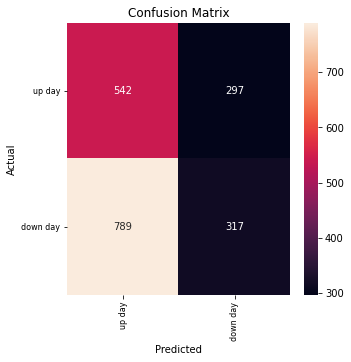

In [ ]:
import seaborn as sns
cm = confusion_matrix(actual, [1 if p > 0 else 0 for p in predicted])
fig, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(cm, annot=True, ax = ax, fmt='g')

ax.set_title('Confusion Matrix') 
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

ax.xaxis.set_ticklabels(['up day','down day'])
ax.yaxis.set_ticklabels(['up day','down day'])
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0, fontsize = 8)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)  
plt.show()

#Rabiner


In [ ]:
!pip3 install quantecon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 179 kB 5.1 MB/s 


In [ ]:
import math
import pandas as pd
import numpy as np
import random
import quantecon as qe
import openpyxl
from openpyxl.writer.excel import save_workbook
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OutputCodeClassifier
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import np_utils
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
matrix = np.array([
    [0.1, 0.2, 0.7],
[0.35, 0.4, 0.25],
[0.5, 0.15, 0.35]
])

q = [2, 1, 0, 2]



def get_vector_pi(matrix, q):
    
    pi = []
    l = len(matrix[0])

    for i in range(0, l):
        print(i)
        print(q[0])
        if i == q[0]:
            pi.append(1)
        else:
            pi.append(0)
    
    return pi

get_vector_pi(matrix, q)    
ar = []
print(ar)
pi = get_vector_pi(matrix, q)
ar.append(pi)
print(ar)
ar.append(pi)
print(ar)

0
2
1
2
2
2
[]
0
2
1
2
2
2
[[0, 0, 1]]
[[0, 0, 1], [0, 0, 1]]


In [ ]:
def get_a_vectors(matrix, q, ar):

    res = []
    s = 0

    for i in range(1, len(q)):
        for j in range(0, len(matrix)):
            if q[i] == j:
                for k in range(0, len(ar[0])):
                    s = s + ar[i-1][k] * matrix[k][j]
                res.append(s)
                s = 0
            else:
                res.append(0)
        ar.append(res)
        res = []
    
    return ar

In [ ]:
def calculate_p(ar):
    return sum(ar[-1])

In [ ]:
def get_p(matrix, q):
    
    ar = []
    pi = get_vector_pi(matrix, q)
    ar.append(pi)
    ar = get_a_vectors(matrix, q, ar)
    p = calculate_p(ar)
    return p

In [ ]:

seq = []
for i in range(0, 2):
    seq.append(random.randint(1, 5))


In [ ]:
matrix = np.array([
    [0.100, 0.100, 0.068, 0.613, 0.319],
[0.100, 0.100, 0.194, 0.254, 0.552],
[0.100, 0.100, 0.119, 0.581, 0.300],
[0.148, 0.852, 0.100, 0.100, 0.100],
[0.591, 0.409, 0.100, 0.100, 0.1000]
])

In [ ]:
matrix = np.array([
    [0.1, 0.2, 0.7],
[0.35, 0.4, 0.25],
[0.5, 0.15, 0.35]
])


In [ ]:
l = len(matrix[0])
l

3

In [ ]:
matrix

array([[0.1 , 0.2 , 0.7 ],
       [0.35, 0.4 , 0.25],
       [0.5 , 0.15, 0.35]])

In [ ]:
seq = [2, 1, 0, 2]
print(len(seq))

4


In [ ]:
seq[1]

1

In [ ]:
# seq = compressed_set.Event_Pattern[0] # HHH,LMM,LHL,MLM,HMH,LML

In [ ]:
seq


[2, 1, 0, 2]

In [ ]:

print(type(unique_patterns[0]))

<class 'str'>


In [ ]:
array = unique_patterns
array

['LLH',
 'MHM',
 'LHM',
 'LML',
 'MHH',
 'MLL',
 'HLH',
 'HLL',
 'MLM',
 'LLL',
 'LHH',
 'MMM',
 'LMM',
 'HMH',
 'HMM',
 'MML',
 'HHL',
 'LMH',
 'MMH',
 'HHH',
 'HHM',
 'MHL',
 'LHL',
 'LLM',
 'HLM',
 'HML',
 'MLH']

In [ ]:
array.sort()
array

['HHH',
 'HHL',
 'HHM',
 'HLH',
 'HLL',
 'HLM',
 'HMH',
 'HML',
 'HMM',
 'LHH',
 'LHL',
 'LHM',
 'LLH',
 'LLL',
 'LLM',
 'LMH',
 'LML',
 'LMM',
 'MHH',
 'MHL',
 'MHM',
 'MLH',
 'MLL',
 'MLM',
 'MMH',
 'MML',
 'MMM']

In [ ]:
array2 = ['HHH', 'HHL', 'HHM']

In [ ]:
array2.sort()

In [ ]:
array2

['HHH', 'HHL', 'HHM']

In [ ]:
import itertools

In [ ]:
listResult = [p for p in itertools.product(array, repeat=4)]

In [ ]:
listResult[280876]

('LLM', 'HML', 'HML', 'MLL')

In [ ]:
list1 = []
forecastLength = 2

for i in range(pow(len(array), forecastLength)):
    list1.append([])
    for j in range(forecastLength):
        list1[i].append(array[j])
        #for z in range(len(array)):
          #  list1[i][j] = array[z]

for i in range(pow(len(array), forecastLength)):
    for z in range(0, forecastLength-1, 1):
        for j in range(0, len(array)-1, 1):
            list1[i][z] = array[j]

#print(forecastLength)
list1.sort()
list1

In [ ]:
import ast
teststr = "['HHH', 'HLH', 'HMH']"
seqArray = ast.literal_eval(teststr)
#len(seqArray)
#print(teststr)
#list(listResult[728])
listResult[728]
print(type(teststr))
print(type(listResult[728]))

print(teststr)

str1 = (f'[{listResult[728]}]').replace('(','').replace(')','')

print(str1)

<class 'str'>
<class 'tuple'>
['HHH', 'HLH', 'HMH']
['HHH', 'HHH', 'MMM', 'MMM']


In [ ]:
!pip install -U featuretools

In [ ]:
result = []
arrayLen = len(unique_patterns)
for i in range(len(listResult)):
    teststr = str1 = (f'[{listResult[i]}]').replace('(','').replace(')','')
    seqArray = ast.literal_eval(teststr)

    matrixVector = 1/arrayLen
    for j in range(0, len(seqArray)-1):
        matrixVector = matrixVector * grid_pos[seqArray[j+1]][seqArray[j]]
        
        if (j == len(seqArray)-2):
            result.append(matrixVector)
    
#print(result)
max_value = max(result)
max_index = result.index(max_value)
print(max_value)
print(max_index)
print(listResult[max_index])
#print(result[max_index])
#print('Max value:', max_value, "At index:", arr.index(max_value))

0.001106931595714514
199380
('LHL', 'HLH', 'LLL', 'LLH')


In [ ]:
result = []
arrayLen = len(unique_patterns)
teststr = "['MLM', 'MLM', 'LHL', 'LHH']"
seqArray = ast.literal_eval(teststr)
matrixVector = 1/arrayLen
for j in range(0, len(seqArray)-1):
    matrixVector = matrixVector * grid_pos[seqArray[j+1]][seqArray[j]]
        
    if (j == len(seqArray)-2):
            result.append(matrixVector)
print(result)

[5.28111308350906e-05]


In [ ]:
result = []
arrayLen = len(unique_patterns)

import ast
teststr = "['MLL', 'HMH', 'MML']"
seqArray = ast.literal_eval(teststr)

maz = 1/arrayLen
for i in range(0, len(seqArray)-1):
      maz = maz * grid_pos[seqArray[i+1]][seqArray[i]]
        
      if (j == len(seqArray)-2):
          result.append(maz)
    
print(result)
print(max_value)
print(max_index)
print(listResult[max_index])
#print(result[max_index])
#print('Max value:', max_value, "At index:", arr.index(max_value))

[]
0.001106931595714514
199380
('LHL', 'HLH', 'LLL', 'LLH')


In [ ]:
teststr = "['MLL', 'HMH', 'MML', 'LMH']"
teststr = "['HLH', 'MLM', 'LML', 'LMH']"
teststr = "['MLM', 'HLH', 'LHL', 'LHL']"
teststr = "['MLM', 'MLM', 'LHL', 'LHH']"

In [ ]:
##import featurestools
##ft._version_

In [ ]:
grid_pos

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.184910,0.009983,0.008291,0.062014,0.436285,0.048350,0.071784,0.091255,0.134771,0.000000,...,0.021486,0.189689,0.243707,0.056743,0.041447,0.003903,0.189042,0.092849,0.112205,0.101746
HHL,0.000000,0.000000,0.000000,0.002176,0.000000,0.000930,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.059211,0.000000,0.000201,0.000000,0.000000,0.000000
HHM,0.022283,0.000000,0.000000,0.112061,0.000000,0.009298,0.007676,0.000000,0.025606,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.015132,0.090490,0.039380,0.001872,0.087598,0.000000
HLH,0.114347,0.003328,0.115357,0.011657,0.077754,0.085542,0.082445,0.000000,0.060310,0.000000,...,0.008057,0.054858,0.000000,0.057566,0.010526,0.008872,0.067882,0.074504,0.006398,0.013891
HLL,0.011239,0.000000,0.000000,0.000000,0.000000,0.000000,0.006397,0.288973,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004493,0.000000,0.000000
HLM,0.040852,0.000000,0.000000,0.000000,0.000000,0.000000,0.005686,0.000000,0.002358,0.010516,...,0.018353,0.210178,0.000000,0.000000,0.000000,0.005323,0.030617,0.000000,0.000000,0.118641
HMH,0.112295,0.000000,0.209084,0.021449,0.000000,0.025570,0.081876,0.106464,0.002022,0.059273,...,0.000000,0.000000,0.032037,0.052083,0.056579,0.055004,0.035754,0.002246,0.094488,0.094425
HML,0.000000,0.000000,0.000000,0.001554,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.012489,0.000000,0.000000,0.000000
HMM,0.056001,0.000000,0.053713,0.006372,0.000000,0.109716,0.027719,0.000000,0.009434,0.000000,...,0.000000,0.000000,0.000000,0.003838,0.007237,0.201916,0.009064,0.000000,0.000000,0.044866


In [ ]:
grid_neg

,HHH,HHL,HHM,HLH,HLL,HLM,HMH,HML,HMM,LHH,...,LMM,MHH,MHL,MHM,MLH,MLL,MLM,MMH,MML,MMM
x,,,,,,,,,,,,,,,,,,,,,
HHH,0.071278,0.139690,0.056529,0.065006,0.184343,0.050281,0.061534,0.046703,0.132061,0.000000,...,0.027214,0.148564,0.085336,0.044515,0.192899,0.017307,0.124985,0.108601,0.132516,0.103210
HHL,0.000000,0.000000,0.000000,0.020107,0.000000,0.029268,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010108,0.000000,0.000000,0.000000
HHM,0.031952,0.000000,0.000000,0.014738,0.000000,0.000000,0.028907,0.000000,0.058824,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.004734,0.033532,0.029254,0.005213,0.000766,0.000000
HLH,0.105337,0.203991,0.120972,0.054039,0.027778,0.211257,0.083286,0.085165,0.043631,0.000000,...,0.074715,0.032459,0.094654,0.000530,0.042209,0.182531,0.107861,0.029974,0.045576,0.111681
HLL,0.019195,0.000000,0.000000,0.000000,0.000000,0.000000,0.003148,0.021978,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.117361,0.000000,0.017376,0.000000,0.000000
HLM,0.080056,0.000000,0.000000,0.000000,0.000000,0.000000,0.007155,0.000000,0.000779,0.017825,...,0.098466,0.121099,0.000000,0.000000,0.022485,0.012439,0.062552,0.000000,0.000000,0.047704
HMH,0.071161,0.000000,0.076880,0.049583,0.000000,0.000000,0.080853,0.000000,0.025711,0.014260,...,0.104899,0.000000,0.040216,0.082141,0.094280,0.058951,0.069093,0.033015,0.247415,0.145118
HML,0.000000,0.000000,0.000000,0.000228,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000789,0.055706,0.010108,0.000000,0.000000,0.000000
HMM,0.036400,0.000000,0.000000,0.037130,0.000000,0.022139,0.054093,0.000000,0.000000,0.000000,...,0.024245,0.000000,0.000000,0.000530,0.001183,0.056787,0.019741,0.000000,0.004596,0.020285
